In [272]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import datetime
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn import linear_model as lm
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train.csv',delimiter=',',header=0)
test = pd.read_csv('data/test.csv',delimiter=',',header=0)

#print train.shape
#print train.columns


R^2: 0.80429
R^2: 0.80429


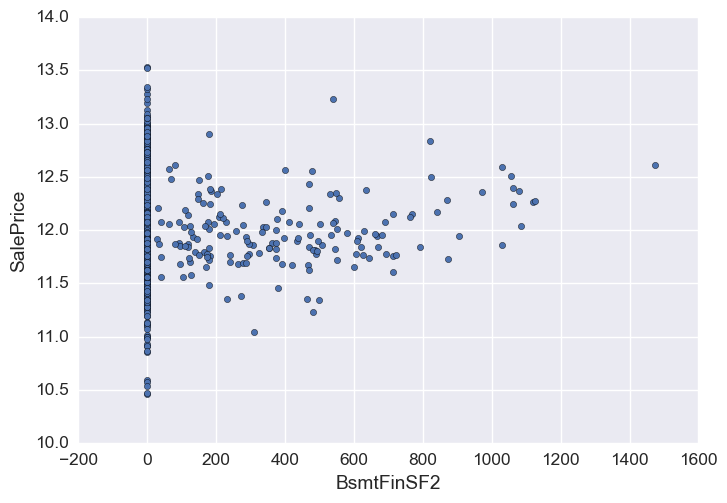

In [267]:
#sns.distplot(np.log(train.loc[train['BsmtFinSF1'] != 0, 'TotalBsmtSF']));
#sns.distplot(train['BsmtFinSF1']+train['BsmtFinSF2']);
#sns.distplot(np.log(train['TotalBsmtSF']));
var = 'BsmtFinSF2'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.BsmtFinSF1 = np.log(data.BsmtFinSF2)
data.SalePrice = np.log(data.SalePrice)
data.plot.scatter(x=var, y='SalePrice');
#print train.loc[train['BsmtFinSF1'] != 0, 'BsmtFinSF1']

train_data2 = train_data.drop( ["TotalBsmtSF", "Heating"], axis=1 )
dev_data2 = dev_data.drop( ["TotalBsmtSF", "Heating"], axis=1 )
#train_data3 = train_data.drop( ["TotalBsmtSF"], axis=1 )
#dev_data3 = dev_data.drop( ["TotalBsmtSF"], axis=1 )

#print train_data[["BedroomAbvGr", "TotRmsAbvGrd", "KitchenAbvGr"]]

reg = LinearRegression()
reg.fit(train_data, train_labels)
reg2 = LinearRegression()
reg2.fit(train_data2, train_labels)
#reg3 = LinearRegression()
#reg3.fit(train_data3, train_labels)
#print "Coefficients: " + str(reg.coef_)
print('R^2: %1.5f' % reg.score(dev_data, dev_labels))
print('R^2: %1.5f' % reg2.score(dev_data2, dev_labels))
#print('R^2: %1.5f' % reg3.score(dev_data3, dev_labels))

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
R^2: 0.80429
R^2: 0.80138
RMSE: 0.16932
RMSE: 0.17413


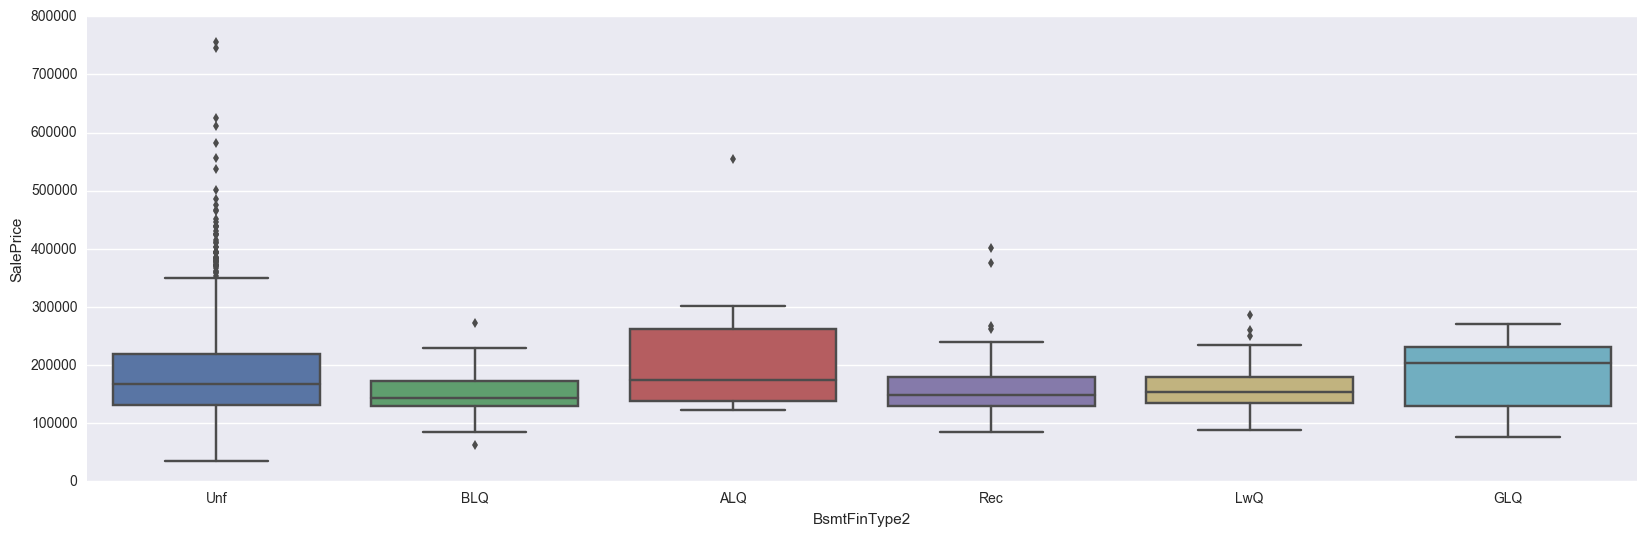

In [163]:
var = 'BsmtFinType2'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

print train['BsmtFinType2'].value_counts()
#print train['SalePrice'].median()
#print pd.factorize(train['BsmtQual'])
#print "Type:",train['BsmtQual'].dtypes

train_data2 = train_data.drop( ["KitchenAbvGr", "KitchenQual"], axis=1 )
dev_data2 = dev_data.drop( ["KitchenAbvGr", "KitchenQual"], axis=1 )

reg = LinearRegression()
reg.fit(train_data, train_labels)
reg2 = LinearRegression()
reg2.fit(train_data2, train_labels)
preds = reg.predict(dev_data)
preds2 = reg2.predict(dev_data2)
#print "Coefficients: " + str(reg.coef_)
print('R^2: %1.5f' % reg.score(dev_data, dev_labels))
print('R^2: %1.5f' % reg2.score(dev_data2, dev_labels))
print('RMSE: %1.5f' % np.sqrt(metrics.mean_squared_error(np.log(dev_labels), np.log(abs(preds)))))
print('RMSE: %1.5f' % np.sqrt(metrics.mean_squared_error(np.log(dev_labels), np.log(abs(preds2)))))

In [285]:
original_train_data = pd.read_csv('data/train.csv',delimiter=',',header=0)
original_test_data = pd.read_csv('data/test.csv',delimiter=',',header=0)
tt = original_train_data.loc[:,"ExterQual":"TotRmsAbvGrd"]
tt2 = original_test_data.loc[:,"ExterQual":"TotRmsAbvGrd"]

#handle NAs with train
tt.loc[332,["BsmtFinType2"]] = tt.loc[0]["BsmtFinType2"]
tt.loc[948,["BsmtExposure"]] = tt.loc[0]["BsmtExposure"]
tt.fillna("None", inplace = True)

#handle NAs with test
tt2.loc[660, ["BsmtFinSF1", "BsmtFinSF2", "TotalBsmtSF", "BsmtUnfSF"]] = 0
tt2.loc[95, ["KitchenQual"]] = tt2.loc[0]["KitchenQual"]
tt2.loc[660, ["BsmtHalfBath", "BsmtFullBath"]] = 0
tt2.loc[728, ["BsmtHalfBath", "BsmtFullBath"]] = 0
tt2.loc[580, ["BsmtCond"]] = tt2.loc[0]["BsmtCond"]
tt2.loc[725, ["BsmtCond"]] = tt2.loc[0]["BsmtCond"]
tt2.loc[1064, ["BsmtCond"]] = tt2.loc[0]["BsmtCond"]
tt2.loc[757, ["BsmtQual"]] = tt2.loc[0]["BsmtQual"]
tt2.loc[758, ["BsmtQual"]] = tt2.loc[0]["BsmtQual"]
tt2.loc[27, ["BsmtExposure"]] = tt2.loc[0]["BsmtExposure"]
tt2.loc[888, ["BsmtExposure"]] = tt2.loc[0]["BsmtExposure"]
tt2.fillna("None", inplace = True)

#create other rooms columns
tt["OtherRmsAbvGr"] = tt["TotRmsAbvGrd"] - (tt["BedroomAbvGr"]+tt["KitchenAbvGr"])
tt2["OtherRmsAbvGr"] = tt2["TotRmsAbvGrd"] - (tt2["BedroomAbvGr"]+tt2["KitchenAbvGr"])

#create binary columns
tt["HasBsmt"] = tt["TotalBsmtSF"] > 0
tt["Has2ndFlr"] = tt["2ndFlrSF"] > 0
tt2["HasBsmt"] = tt2["TotalBsmtSF"] > 0
tt2["Has2ndFlr"] = tt2["2ndFlrSF"] > 0

#drop total columns
tt = tt.drop(["GrLivArea", "TotalBsmtSF", "TotRmsAbvGrd"], axis = 1)
tt2 = tt2.drop(["GrLivArea", "TotalBsmtSF", "TotRmsAbvGrd"], axis = 1)

#log transforms of area
tt["BsmtFinSF1"] = np.log(tt["BsmtFinSF1"]+1)
tt["BsmtFinSF2"] = np.log(tt["BsmtFinSF2"]+1)
tt["BsmtUnfSF"] = np.log(tt["BsmtUnfSF"]+1)
tt["1stFlrSF"] = np.log(tt["1stFlrSF"]+1)
tt["2ndFlrSF"] = np.log(tt["2ndFlrSF"]+1)
tt["LowQualFinSF"] = np.log(tt["LowQualFinSF"]+1)

tt2["BsmtFinSF1"] = np.log(tt2["BsmtFinSF1"]+1)
tt2["BsmtFinSF2"] = np.log(tt2["BsmtFinSF2"]+1)
tt2["BsmtUnfSF"] = np.log(tt2["BsmtUnfSF"]+1)
tt2["1stFlrSF"] = np.log(tt2["1stFlrSF"]+1)
tt2["2ndFlrSF"] = np.log(tt2["2ndFlrSF"]+1)
tt2["LowQualFinSF"] = np.log(tt2["LowQualFinSF"]+1)

#add dummies
tt = pd.get_dummies(tt)
tt2 = pd.get_dummies(tt2)

tt.to_csv('data/train2.csv')
tt2.to_csv('data/test2.csv')

#print tt.columns
#pf = PF(2, True, False)
#print tt["BsmtFinSF1"].describe()
#sns.distplot(tt['BsmtFinSF1']);
#print pf.fit_transform(tt.loc[:10,["BsmtFinSF1","BsmtFinType1_BLQ","BsmtFinType1_ALQ","BsmtFinType1_GLQ","BsmtFinType1_LwQ"]])

print "done"



done


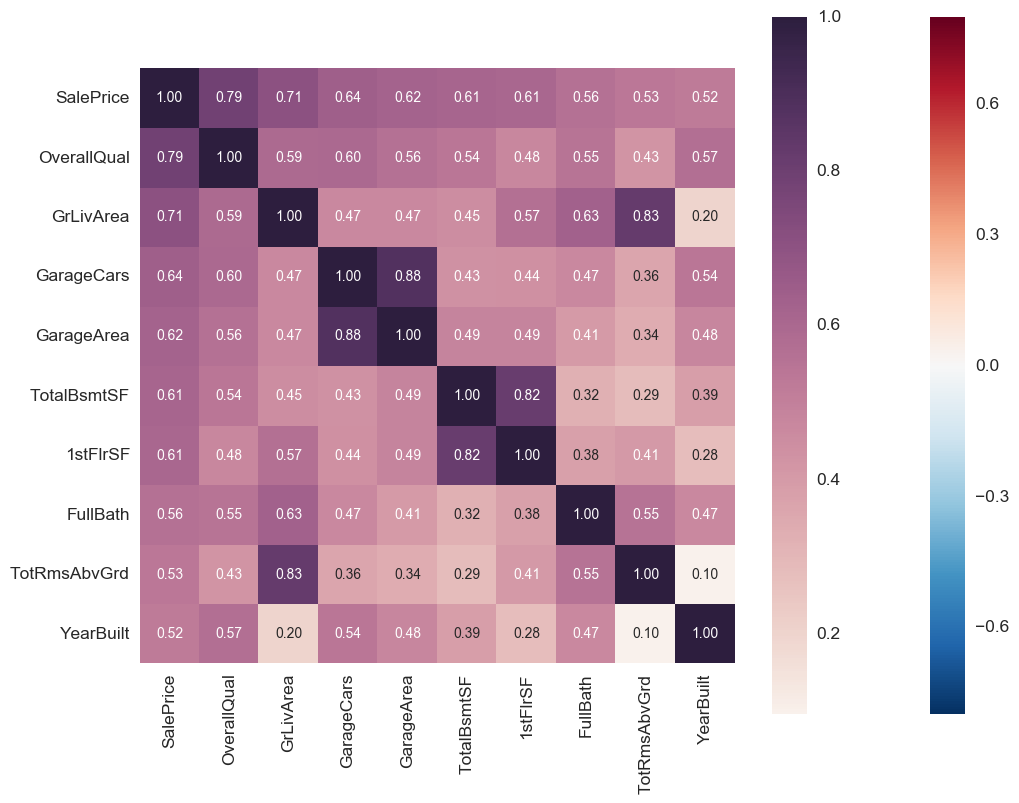

In [269]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [70]:
total = train.isnull().sum().sort_values(ascending=False)
total.head(20)
train.loc[train.BsmtFinType2.isnull(),'ExterQual':'BsmtFinType2']

,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2
17,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN
39,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN
90,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN
102,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN
156,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN
182,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN
259,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN
332,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN
342,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN
362,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN


In [126]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques

original_train_data = pd.read_csv('data/train.csv',delimiter=',',header=0)
original_test_data = pd.read_csv('data/test.csv',delimiter=',',header=0)

# train data; convert categoricals to integers
obj_columns = original_train_data.select_dtypes(['object']).columns
original_train_data[obj_columns] = original_train_data[obj_columns].apply(lambda x: x.astype('category').cat.codes)
original_train_data = original_train_data.fillna(value=0)

# test data; convert categoricals to integers
obj_columns = original_test_data.select_dtypes(['object']).columns
original_test_data[obj_columns] = original_test_data[obj_columns].apply(lambda x: x.astype('category').cat.codes)
original_test_data = original_test_data.fillna(value=0)

shuffle = np.random.permutation(np.arange(original_train_data.shape[0]))
original_train_data = original_train_data.ix[shuffle]

testdev_split = 1000

train_data = original_train_data.copy()[:testdev_split]
train_labels = train_data["SalePrice"].copy()
train_data = train_data.drop( ["SalePrice"], axis=1 )

dev_data = original_train_data.copy()[testdev_split:]
dev_labels = dev_data["SalePrice"].copy()
dev_data = dev_data.drop( ["SalePrice"], axis=1 )

test_data = original_test_data.copy()

# check data quality
print original_train_data.shape
print train_data.shape
print dev_data.shape


(1460, 81)
(1000, 80)
(460, 80)


#IDEAS

: Dlb-check category conversion...NaN = 0 after, but before?; address?
: Check distributions; adjust skew if necessary
: Normalization/scaling


In [69]:
train_data2 = train_data.drop( ["BsmtExposure"], axis=1 )
dev_data2 = dev_data.drop( ["BsmtExposure"], axis=1 )

reg = LinearRegression()
reg.fit(train_data, train_labels)
reg2 = LinearRegression()
reg2.fit(train_data2, train_labels)
#print "Coefficients: " + str(reg.coef_)
print('R^2: %1.5f' % reg.score(dev_data, dev_labels))
print('R^2: %1.5f' % reg2.score(dev_data2, dev_labels))



R^2: 0.80208
R^2: 0.80372


In [47]:
from sklearn.feature_selection import RFE
max_score = 0
max_feature_count = 0
max_features = []

for idx in range(1,original_train_data.shape[1]):
    reg = LinearRegression()
    rfe = RFE(estimator=reg, n_features_to_select=idx, step=1)
    rfe.fit(train_data, train_labels)
    run_score = rfe.score(dev_data, dev_labels)
    if (run_score > max_score):
        max_score = run_score
        max_feature_count = idx
        max_features = rfe.support_

print "Max score: " + str(max_score)
print "# features to keep: " + str(max_feature_count)
print "Keep:"
print train_data.columns[max_features]
print "Remove:"
print train_data.columns[max_features==False]

Max score: 0.840546216395
# features to keep: 67
Keep:
Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'Street', u'LotShape',
       u'LandContour', u'Utilities', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'Condition1', u'Condition2', u'BldgType',
       u'HouseStyle', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'RoofStyle', u'RoofMatl', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'MasVnrArea', u'ExterQual',
       u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinType1', u'BsmtFinType2', u'TotalBsmtSF', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF',
       u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath',
       u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd',
       u'Functional', u'Fireplaces', u'FireplaceQu', u'GarageType',
       u'GarageFinish', u'GarageCars', u'GarageQual', u'GarageCond',
       u'PavedDrive', u'WoodDeckS

In [4]:
reg = LinearRegression()
reg.fit(train_data, train_labels)
print "Coefficients: " + str(reg.coef_)
print('R^2: %1.2f' % reg.score(dev_data, dev_labels))

# various score measures
pred_labels = reg.predict(dev_data)

# r2_score should be the same as reg.score
print metrics.r2_score(dev_labels,pred_labels, multioutput='uniform_average')
print metrics.explained_variance_score(dev_labels,pred_labels, multioutput='uniform_average')

Coefficients: [ -6.89587912e+00  -5.99661013e+01  -2.41192392e+03  -4.23986755e+01
   6.77061818e-01   5.57370104e+04  -2.08138387e+02  -8.85413134e+02
   2.79019372e+03  -5.61971662e+04   8.68934032e+02   5.30221730e+03
   1.45333531e+02  -7.80246717e+02  -3.94473526e+02  -2.29138233e+03
  -3.13660938e+02   8.59990554e+03   6.49627908e+03   2.06301301e+02
  -7.70077526e+01   3.16546314e+03   1.54903739e+03  -1.79375672e+03
   1.07009605e+03   5.06887623e+03   4.75995224e+01  -1.17688078e+04
   1.40819190e+02   9.00908618e+02  -9.80774865e+03   1.53767100e+03
  -3.26586565e+03  -4.50351250e+00   4.69332195e+00   4.37033705e+03
   1.29789854e+01  -9.66484669e-01   1.67058225e+01  -3.25926025e+03
  -2.25725808e+02   1.88022852e+03  -3.63269094e+02   1.91675789e+01
   2.58934722e+01  -3.01539699e+01   1.49070802e+01   8.37170054e+03
   8.01412362e+00   5.29951182e+03   7.60630357e+02  -2.86512498e+03
  -2.23342755e+04  -7.49337597e+03   3.61198147e+03   3.26305904e+03
   6.77143817e+03  -